<font size="6">MEC301 - Métodos Numéricos</font>
# Ecuaciones Diferenciales Ordinarias con Condiciones de Borde
<br><br><br><br>
Profesor: Francisco Ramírez Cuevas<br>
Fecha: 12 de noviembre 2022

## Introducción




En la unidad anterior nos enfocamos en ecuación diferenciales ordinarias condionadas por valores iniciales.

Repasando la ecuación del péndulo:

**Ecuación gobernante**

\begin{equation*}
ml\frac{d^2}{dt^2}\Theta(t) + \kappa\frac{d}{dt}\Theta(t) + mg \sin \Theta(t) = 0
\end{equation*}

**Condiciones iniciales**
\begin{align*}
\dot{\Theta}(t = 0) &= 0 \\
\Theta(t = 0) &= \Theta_0
\end{align*}

Ahora, supontagamos que en el problema del péndulo conocemos el ángulo en $t = 0$, y en un tiempo $t = t_1$, tal que $\Theta(t_1) = \Theta_1$. 

En este caso, la EDO está condicionada por **condiciones de borde**, en la forma


**Ecuación gobernante**

\begin{equation*}
ml\frac{d^2}{dt^2}\Theta(t) + \kappa\frac{d}{dt}\Theta(t) + mg \sin \Theta(t) = 0
\end{equation*}

**Condiciones de borde**
\begin{align*}
\Theta(t = 0) &= \Theta_0 \\
\Theta(t = t_1) &= \Theta_1
\end{align*}

Una condición de borde, así se define como el *condicionamiento de una solución en valores extremos*

Aunque en el ejemplo anterior consideramos la variable tiempo, los problemas de condiciones de borde son normalmente aplicados para variables espaciales.

Por ejemplo, consideremos el problema de una barra de largo $L$, con temperatura constante en los extremos izquierdo y derecho $T_a$ y $T_b$, respectivamente, y expuesta a pérdidas de calor por convección y radiación.

<img src="./images/heated_bar.png" width="400px" align= center>

La ecuación que describe la distribución de temperaturas en el eje axial está definida por:

\begin{equation*}
\frac{d^2T}{dx^2} + h'(T_\infty - T) + \sigma'(T_\infty^4 - T^4) = 0
\end{equation*}

donde $h'$ y $\sigma'$ son coeficientes de transferencia de calor por convección y radiación, respectivamente.

y las condiciones de borde son:
\begin{align*}
T(0) &= T_a\\
T(L) &= T_b
\end{align*}

El modelo respresenta una **EDO no lineal con condiciones de borde**.

En esta unidad revisaremos dos métodos para resolver este tipo de problemas:

- Método del disparo
- Método de diferencias finitas

## El método de disparo

El método del disparo consiste en transformar una EDO con condiciones de borde a una EDO de valor inicial. Mediante un proceso iterativo, el método busca una solución al problema de valores iniciales que satisfaga la condiciones de bordes.

Para ilustrar este método, consideremos el problema de la barra con enfriamiento.

Podemos transformar este problema en un problema de valor inicial de la forma:

\begin{align*}
\frac{dT}{dx} &= z \\
\frac{dz}{dx} &= - h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)
\end{align*}

Con condiciones iniciales:

\begin{align*}
T(0) &= T_a \\
z(0) &= z_a
\end{align*}

Si conocieramos el valor de $T_a$ y $z_a$, podríamos resolver el problema como una EDO con valor inicial. Sin embargo, el valor de $z_a$ es desconocido.

El método del disparo, así, consiste en iterar sobre el valor de $z_a$, resolviendo el problema como una EDO de valor inicial, hasta que $T(L) = T_b$.

Ilustrativamente, esto es similar a ajustar el ángulo de inclinación de un cañón (o la pendiente a través de $z_a$), hasta que la trayectoria del disparo coincida con el valor la segunda condición de borde.

<img src="./images/shooting_method.png" width="400px" align= center>

Analicemos esto con el problema de la barra en enfriamiento, y los valores:
 - $L = 10$ m
 - $h' = 0.05$ m$^{-2}$
 - $\sigma' =  2.7\times 10^{-9}$ K$^{-3}$ m$^{-2}$,  
 - $T_\infty = 200~\mathrm{K}$, 
 - $T_a = 300~\mathrm{K}$
 - $T_b = 400~\mathrm{K}$

Si escribimos la EDO con valor inicial de la forma $\vec{y} = \vec{F}(t,\vec{y})$, tenemos:

\begin{equation*}
\vec{y} = \Bigg\{\begin{matrix}
T \\
z
\end{matrix}\Bigg\};
\quad\quad
\vec{F} = \Bigg\{\begin{matrix}
z \\
- h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)
\end{matrix}\Bigg\};\quad\quad \vec{y}_0 = \Bigg\{\begin{matrix}
T_a \\
z_a
\end{matrix}\Bigg\}
\end{equation*}

donde $t = x$.

Resolveremos este problema para distintos valores de $z_a$.

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Definimos las constantes
h   = 0.05   # coeficiente convectivo (m^-2)
S   = 2.7E-9 # coeficiente radiativo (K^-3 m^-2)
Too = 200    # Temperatura del exterior (K)
Ta  = 300    # Temperatura extremo izquierdo (K)
Tb  = 400    # Temperatura extremo derecho (K)
L   = 10     # Largo de la barra (m)

# Declaramos F con y[0] = T, y[1] = z
F = lambda t,y: [y[1], 
                - h*(Too - y[0]) - S*(Too**4 - y[0]**4)]

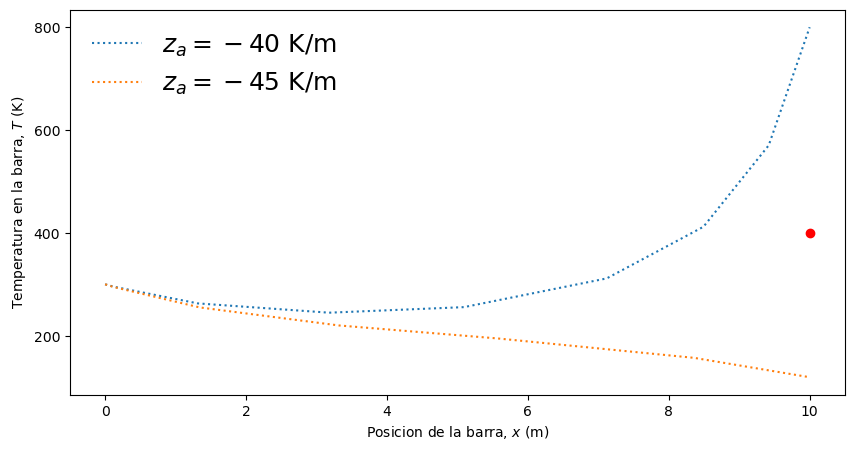

In [2]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

plt.plot(L,Tb,'or')
# Resolvemos la ecuación para distintos valores de za
for za in [-40, -45]:
    sol = solve_ivp(F,t_span = [0,L], y0 = [Ta, za])
    ax.plot(sol.t,sol.y[0],':',label=r'$z_a = %.0f$ K/m' % za)

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

¿Cómo podemos adivinar el valor de $z_a$ correcto?

Cláramente, el método gráfico nos ayuda a acercarnos a la solución. Por ejemplo, notamos ahora que el valor de $z_a$ está acotado entre $z_a\in[-40, -45]$ K/m. Asi, una alternativa sería utilizar interpolación lineal basado en estos dos primeras estimaciones.

Sin embargo, este método aún podría entregar resultados inexactos dado que la EDO es del tipo no-lineal.

Una forma más genérica de resolver este problema en un computador es utilizando métodos de búsqueda de raices.

Primero, debemos entender que resolver nuesta EDO con valor inicial y evaluarla en $x = L$, es equivalente a tener una función $T_{x=L}(z_a)$.

Así, el objetivo es encontrar la raíz de la función $f(z_a) = T_{x=L}(z_a) - T_b$

Implementemos esta solución mediante con el ejemplo anterior.

In [3]:
from scipy.optimize import fsolve

# Declaramos la función objetivo, f(za)
def fobjective(za):
    sol = solve_ivp(F,t_span = [0,L], y0 = [Ta, za])
    T = sol.y[0]      # distribución de temperaturas en la barra
    return T[-1] - Tb # retornamos T(x = L) - Tb

# Buscamos la raiz de f(za) - Tb
za_sol = fsolve(fobjective, x0 = -40)
print('El valor de za es: %.3f K/m' % za_sol)

El valor de za es: -41.735 K/m


/home/panxopanza/s/miniconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
/home/panxopanza/s/miniconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


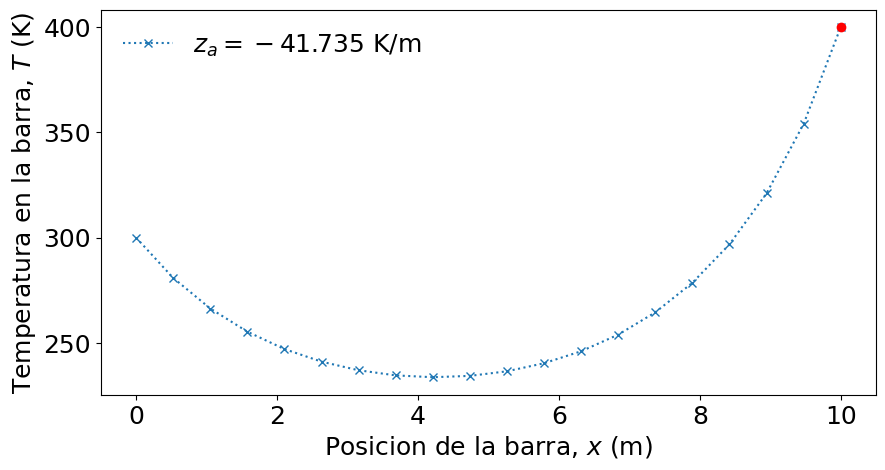

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

x_range = np.linspace(0,L,20)  # rango de valores para evaluar T(x)

sol = solve_ivp(F,t_span = [0,L], t_eval = x_range, y0 = [Ta, za_sol])
ax.plot(sol.t,sol.y[0],':x',label=r'$z_a = %.3f$ K/m' % za_sol)
plt.plot(L,Tb,'or')

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

La condición de borde $T(L) = T_b$, o *condición de borde de Dirichlet.* Es una de muchos tipos de condiciones de borde que se utilizan en ingeniería y ciencias.

A veces, las condiciones de borde están definidas en función de derivadas.

Por ejemplo, respecto al problema de la barra, es común definir una condición de borde convectiva, o *condición de borde de Neumann:*

\begin{equation*}
\frac{dT}{dx}\Big|_{x=L} = h^*\left[ T_\infty - T(L)\right]
\end{equation*}

<img src="./images/heated_bar_convective_end.png" width="500px" align= center>

Para este tipo de problemas, todo lo que debemos hacer es modificar nuestra función objetivo.

Revisemos esto en un código para $h^* = 0.005$ m$^{-1}$

In [5]:
from scipy.optimize import fsolve

hstar = 0.005

# Declaramos la función objetivo, f(za) con condición de Neumann
def fobjective(za):
    sol = solve_ivp(F,t_span = [0,L], y0 = [Ta, za])
    T    = sol.y[0]                       # distribución de temperaturas en la barra
    dTdx = sol.y[1]                       # distribución de dTdx en la barra
    return dTdx[-1] - hstar*(Too - T[-1]) # retornamos dTdx|(x=L) - h(Too - T(L))

# Buscamos la raiz de f(za) - Tb
za_sol = fsolve(fobjective, x0 = -45)
print('El valor de za es: %.3f K/m' % za_sol)


El valor de za es: -43.720 K/m


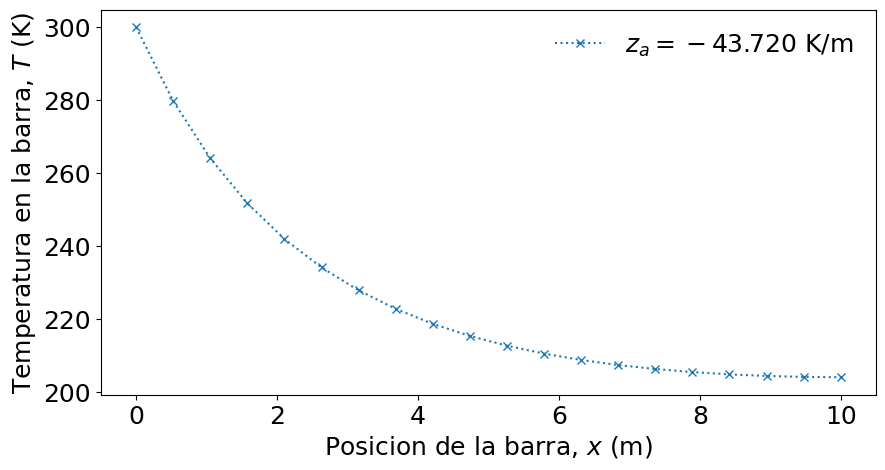

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

x_range = np.linspace(0,L,20)  # rango de valores para evaluar T(x)

sol = solve_ivp(F,t_span = [0,L], t_eval = x_range, y0 = [Ta, za_sol])
ax.plot(sol.t,sol.y[0],':x',label=r'$z_a = %.3f$ K/m' % za_sol)

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

## El método de diferencias finitas

La alternativa más común para resolver EDOs con condiciones de borde es mediante diferencias finitas. Esto consiste en discretizar la ecuación diferencial utilizando las fórmulas de la [unidad 8](https://panxopanza.github.io/metodos_numericos_mec301/8-Derivacion_numerica/8-Derivacion_numerica.html#).

Revisemos esto con el problema de la barra. Ahora, únicamente, considerando pérdidas de calor por convección.

<img src="./images/heated_bar_convection_losses.png" width="400px" align= center>

En este caso **la EDO es del tipo lineal**:

\begin{equation*}
\frac{d^2T}{dx^2} + h'(T_\infty - T) = 0
\end{equation*}

\begin{align*}
T(0) &= T_a\\
T(L) &= T_b
\end{align*}

El primer paso consiste en discretizar el dominio en una série de nodos.

<img src="./images/discretized_bar.png" width="500px" align= center>

Luego, aplicamos una fórmula de diferencias finitas en cada nodo. Por ejemplo, usando diferencia central tenemos:

\begin{equation*}
\frac{T_{i - 1}- 2T_i +T_{i + 1}}{\Delta x^2} + h'(T_\infty - T_i) = 0
\end{equation*}

Reordenando los términos tenemos:

\begin{equation*}
- T_{i - 1}+ (2 + h'\Delta x^2)T_i  - T_{i + 1} =  h'\Delta x^2 T_\infty
\end{equation*}

Podemos desarrollar esta expresión para cada nodo interior ($i = 1,\cdots, n-1$). Los valores de los nodos extremos están dados por las condiciones de borde $T_0 = T_a$, $T_n = T_b$.

El resultado nos entrega un sistema de ecuaciones lineales $Ax = b$, de la forma:

\begin{equation*}
\begin{bmatrix}
(2 + h'\Delta x^2) & -1 & & & \\
-1 & (2 + h'\Delta x^2) & -1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & -1& (2 + h'\Delta x^2)& -1 \\
 & & -1 & & (2 + h'\Delta x^2)
\end{bmatrix}\left[\begin{array}{c} T_1 \\T_2 \\ \vdots \\ T_{n-2} \\ T_{n-1} \end{array}\right] =
\left[\begin{array}{c} T_0 + h'\Delta x^2 T_\infty \\h'\Delta x^2 T_\infty \\ \vdots \\h'\Delta x^2 T_\infty \\ T_n + h'\Delta x^2 T_\infty\end{array}\right]
\end{equation*}

Notar que **la matriz $A$ en este caso es diagonal dominante**. Este es un aspecto fundamental del método de diferencias finitas, ya que permite determinar soluciones mediante métodos iterativos como Gauss-Seidel.

Como discutimos en la [unidad 2](https://panxopanza.github.io/metodos_numericos_mec301/2-Algebra_lineal/2-Algebra_lineal.html#metodos-iterativos) del curso, los métodos iterativos son más eficientes y requiren menor cantidad memoria computacional, permitiendo un cálculo eficiente.

Revisemos esto en un código en python. En este caso, queremos preparar un código genérico para un $n$ variable

Podemos expresar el sistema de ecuaciones, convenientemente, en la forma:

\begin{equation*}
\begin{bmatrix}
 1 &                  0 &                  0 &            \cdots &                    & \\ 
-1 & (2 + h'\Delta x^2) &                 -1 &                   &                    & \\
   & \ddots             & \ddots             &            \ddots &                    &\\
   &                    &                    &                -1 & (2 + h'\Delta x^2) & -1 \\
   &                    &             \cdots &                 0 &             0      & 1
\end{bmatrix}\left[\begin{array}{c} T_0 \\ T_1 \\ \vdots \\ T_{n-1} \\T_n \end{array}\right] =
\left[\begin{array}{c} T_a \\ h'\Delta x^2 T_\infty \\ \vdots \\ h'\Delta x^2 T_\infty \\ T_b\end{array}\right]
\end{equation*}

Esta forma nos permitirá una expresión más simplificada para crear nuestras matrices $A$ y $b$.

In [7]:
# Código genérico para barra 1D con diferencias finitas

N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

A = np.zeros((N,N))  # declaramos matrix A
b = np.zeros(N)      # declaramos vector b
for i in range(N):
    
    # condiciones de borde
    if i == 0:       # Temperatura fija en el extremo izquierdo
        A[i,i] = 1
        b[i]   = Ta
        continue
    
    if i == n:       # Temperatura fija en el extremo derecho
        A[i,i] = 1
        b[i]   = Tb
        continue
    
    # nodos interiores
    A[i,i-1] = -1
    A[i, i ] =  2 + h*dx**2
    A[i,i+1] = -1
    
    b[i] = h*dx**2*Too

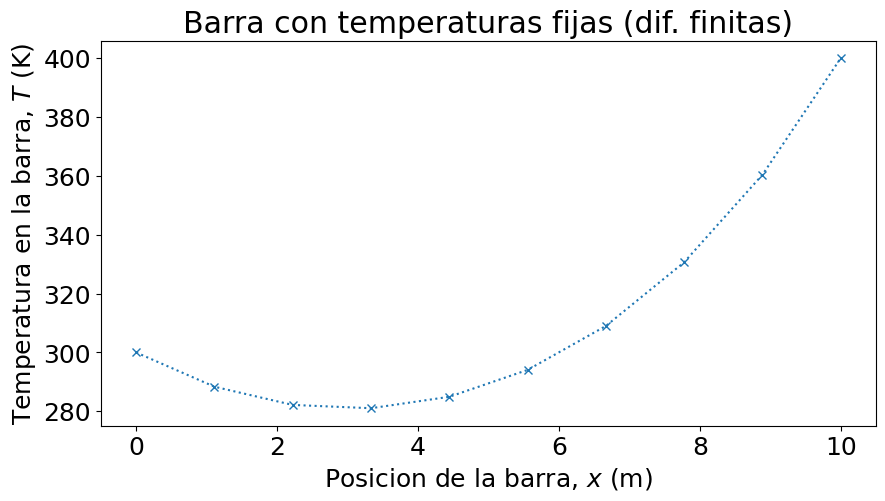

In [8]:
# Discretización del dominio "x"
x = np.linspace(0,L,N)

# Resolvemos el sistema
T = np.linalg.solve(A,b)

fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente
ax.plot(x,T,':x')

ax.set_title('Barra con temperaturas fijas (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

Consideremos ahora el caso de una barra con condiciones de borde de Neuman:

\begin{equation*}
\frac{dT}{dx}\Big|_{x=L} = h^*\left[ T_\infty - T(L)\right]
\end{equation*}

<img src="./images/heated_bar_convection_losses_convective_end.png" width="500px" align= center>

Podemos aplicar diferencias hacia atrás en la condición de borde:

\begin{equation*}
\frac{T_{n}- T_{n - 1}}{\Delta x} = h'(T_\infty - T_n)
\end{equation*}

A partir de esto tenemos una nueva ecuación de la forma:

\begin{equation*}
- T_{n-1} + (1 + h'\Delta x)T_{n} = h'\Delta xT_\infty
\end{equation*}

El sistema de ecuaciones es similar al caso anterior, aunque con la nueva condición de borde en el nodo del extremo derecho:

\begin{equation*}
\begin{bmatrix}
 1 &                  0 &                  0 &            \cdots &                    & \\ 
-1 & (2 + h'\Delta x^2) &                 -1 &                   &                    & \\
   & \ddots             & \ddots             &            \ddots &                    &\\
   &                    &                    &                -1 & (2 + h'\Delta x^2) & -1 \\
   &                    &             \cdots &                 0 &              -1    & 1 + h'\Delta x
\end{bmatrix}\left[\begin{array}{c} T_0 \\ T_1 \\ \vdots \\ T_{n-1} \\T_n \end{array}\right] =
\left[\begin{array}{c} T_a \\ h'\Delta x^2 T_\infty \\ \vdots \\ h'\Delta x^2 T_\infty \\ h'\Delta x T_\infty\end{array}\right]
\end{equation*}

La implementación en código es análoga al caso anterior. Notar que ahora solo editamos la condición de borde para $i = n$

In [9]:
# Código genérico para barra 1D con diferencias finitas
     
N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

A = np.zeros((N,N))  # declaramos matrix A
b = np.zeros(N)      # declaramos vector b
for i in range(N):
    
    # condiciones de borde
    if i == 0:     # Temperatura fija en el extremo izquierdo
        A[i,i] = 1
        b[i]   = Ta
        continue
    
    if i == n:     # convección en el extremo derecho
        A[i,i-1] = -1
        A[i,i]   = 1 + h*dx
        b[i]     = h*dx*Too
        continue
    
    # nodos interiores
    A[i,i-1] = -1
    A[i, i ] =  2 + h*dx**2
    A[i,i+1] = -1
    
    b[i] = h*dx**2*Too

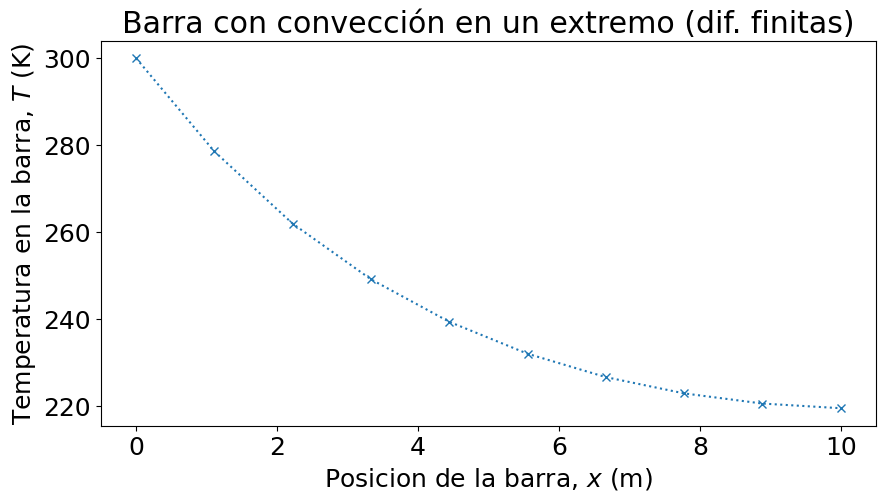

In [10]:
# Discretización del dominio "x"
x = np.linspace(0,10,N)

# Resolvemos el sistema
T = np.linalg.solve(A,b)

fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente
ax.plot(x,T,':x')

ax.set_title('Barra con convección en un extremo (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

Si la EDO es no lineal la forma de resolver el problema es análoga. Sin embargo, el sistema de ecuaciones a resolver también será del tipo no lineal y para esto debemos utilizar un método de búsqueda de raices.

Revisemos esto con el problema de la barra con enfriamiento por radiación y convección

<img src="./images/heated_bar_convective_end.png" width="500px" align= center>

La ecuación discretizada por diferencias finitas es de la forma:

\begin{equation*}
\frac{T_{i - 1}- 2T_i +T_{i + 1}}{\Delta x^2} + h'(T_\infty - T_i) + \sigma'(T_\infty^4 - T_i^4) = 0
\end{equation*}

Reordenando los términos tenemos:

\begin{equation*}
- T_{i - 1}+ (2 + h'\Delta x^2)T_i + \sigma'\Delta x^2 T_i^4 - T_{i + 1} - h'\Delta x^2 T_\infty - \sigma' \Delta x^2 T_\infty^4 = 0
\end{equation*}

In [11]:
# Código genérico para barra 1D con diferencias finitas

N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

def fsystem(T):
    
    f = np.zeros(N)
    for i in range(N):
    
        # condiciones de borde
        if i == 0:     # Temperatura fija en el extremo izquierdo
            f[0] = T[0] - Ta
            continue
        if i == n:     # convección en el extremo derecho
            f[n] = - T[n-1] + (1 + h*dx)*T[n] - h*dx*Too
            continue
    
        # nodos interiores
        f[i] = - T[i-1] + (2 + h*dx**2)*T[i] + S*dx**2*T[i]**4 - T[i+1] - h*dx**2*Too - S*dx**2*Too**4
        
    return f

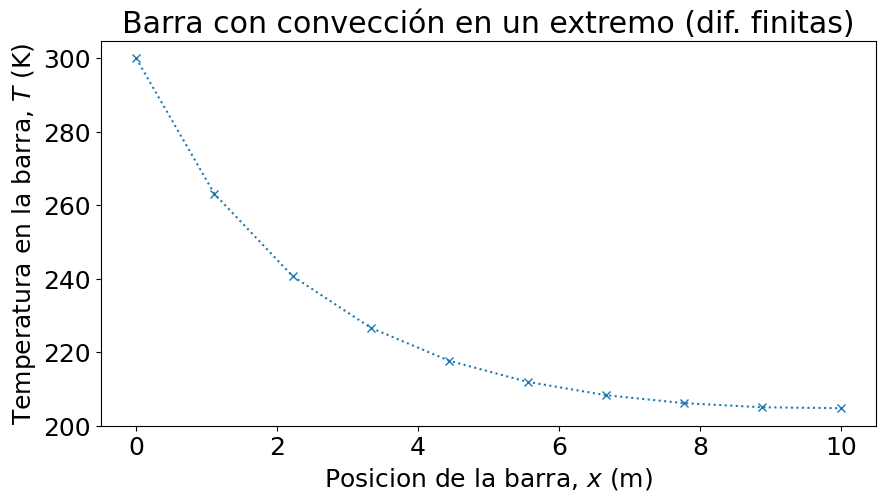

In [12]:
from scipy.optimize import fsolve
# condicionamos la variable inicial para la iteración
Tinc = np.zeros(N)
Tinc[0], Tinc[-1] = Ta, Too

T = fsolve(fsystem, x0 = Tinc)  # Solución del sistema no lineal
x = np.linspace(0,10,N)         # Discretización del dominio "x"

fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente
ax.plot(x,T,':x')

ax.set_title('Barra con convección en un extremo (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

## Errores numéricos y  estabilidad

Los problemas con condiciones de borde también estan expuestos a errores por truncamiento y por estabilidad.

-  En el caso del **método del disparo**, el error es similar a lo discutido con los métodos para resolver EDOs con valor inicial. Es decir, **este método puede presentar problemas de inestabilidad y errores de truncamiento** dependiendo del método utilizado para resolver el problema de valor inicial

- En el caso del **método de diferencias finitas**, el **error está directamente asociado al truncamiento de la serie de Taylor**, lo cual depende del esquema utilizado para la discretización (diferencia central, diferencia hacia adelante, etc).

Por último es importante mencionar que el método de diferencias finitas es fácilmente extensible a problemas expresados en ecuaciones diferenciales parciales, mientras que el método del disparo solo puede ser planteado para EDOs con valor inicial. Esto lo revisaremos en la próxima unidad del curso.

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 23: Boundary-Value Problems for ODEs** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.00-ODE-Boundary-Value-Problems.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 27 Problemas de valores en la frontera y de valores própios** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011
